# E-Commerce Sales Analysis

# Objectives
# 1) Calculete yearly sale revenue earn.
# 2) Calculate Monthly Sales and identify which is the highest & lowest saleing month.
# 3) Analyze sales based product category & identify which is the highest and lowest category.
# 4) The sales analysis needs to be done based on sub-category.
# 5) Need to analyze the monthly pfrofit and identify which is the highest & lowest profit month.
# 6) Analyze profit by Category and Sub-category.
# 7) Analyze month wise profit.
# 8) Calculete which region earns the highest and lowest Revenue.
# 9) Analyze most preferalbe shiping mode by customer segment.
# 10) Analyze Customer segment wise sales and profit.
# ~~~~~:~~~~~
# Required Library Imports

In [7]:
import pandas as pd
import plotly.express as px
import plotly.graph_objects as pgo
import plotly.io as pio
import plotly.colors as pcolour
pio.templates.default = "plotly_white"

# data import and info. read

In [9]:
df = pd.read_csv("Sample - Superstore.csv", encoding = 'latin-1')

In [17]:
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


# Statistical description and information of the data set 

In [28]:
df.describe()

,Row ID,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,4997.500000,55190.379428,229.858001,3.789574,0.156203,28.656896
std,2885.163629,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1.000000,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,2499.250000,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,4997.500000,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,7495.750000,90008.000000,209.940000,5.000000,0.200000,29.364000
max,9994.000000,99301.000000,22638.480000,14.000000,0.800000,8399.976000


In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Row ID         9994 non-null   int64         
 1   Order ID       9994 non-null   object        
 2   Order Date     9994 non-null   datetime64[ns]
 3   Ship Date      9994 non-null   datetime64[ns]
 4   Ship Mode      9994 non-null   object        
 5   Customer ID    9994 non-null   object        
 6   Customer Name  9994 non-null   object        
 7   Segment        9994 non-null   object        
 8   Country        9994 non-null   object        
 9   City           9994 non-null   object        
 10  State          9994 non-null   object        
 11  Postal Code    9994 non-null   int64         
 12  Region         9994 non-null   object        
 13  Product ID     9994 non-null   object        
 14  Category       9994 non-null   object        
 15  Sub-Category   9994 n

# Data cleaning or manipulation
# -----!!!~~~~

# Order_date data type conversion

In [54]:
df["Order Date"] = pd.to_datetime(df["Order Date"])
df["Ship Date"] = pd.to_datetime(df["Ship Date"])

# Addition of 3 columns accordingly year, month , day

In [61]:
df["Order_year"] = df["Order Date"].dt.year
df["Order_month"] = df["Order Date"].dt.month
df["Order_day"] = df["Order Date"].dt.dayofweek

In [65]:
df.head(2)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Order_year,Order_month,Order_day
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.96,2,0.0,41.9136,2016,11,1
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.94,3,0.0,219.5820,2016,11,1


# 1) Calculete yearly sales revenue earn.

In [71]:
Sales_by_year = df.groupby("Order_year")['Sales'].sum().reset_index()

   Order_year        Sales
0        2014  484247.4981
1        2015  470532.5090
2        2016  609205.5980
3        2017  733215.2552


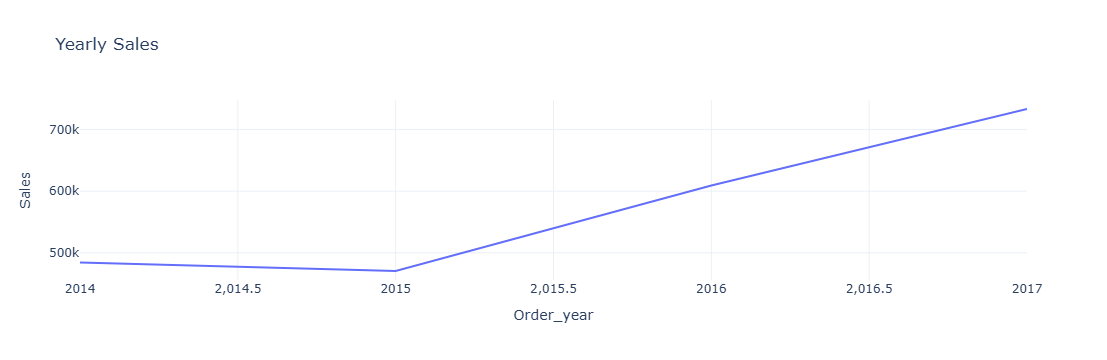

In [83]:
Sales_by_year
print(Sales_by_year)
Yearly_sales_fig = px.line(Sales_by_year,
                           x = 'Order_year',
                           y = 'Sales',
                           title = "Yearly Sales")
Yearly_sales_fig.show()

# 2) Calculate Monthly Sales and identify which is the highest & lowest saleing month.

In [85]:
Sales_by_month = df.groupby("Order_month")['Sales'].sum().reset_index()

    Order_month        Sales
0             1   94924.8356
1             2   59751.2514
2             3  205005.4888
3             4  137762.1286
4             5  155028.8117
5             6  152718.6793
6             7  147238.0970
7             8  159044.0630
8             9  307649.9457
9            10  200322.9847
10           11  352461.0710
11           12  325293.5035


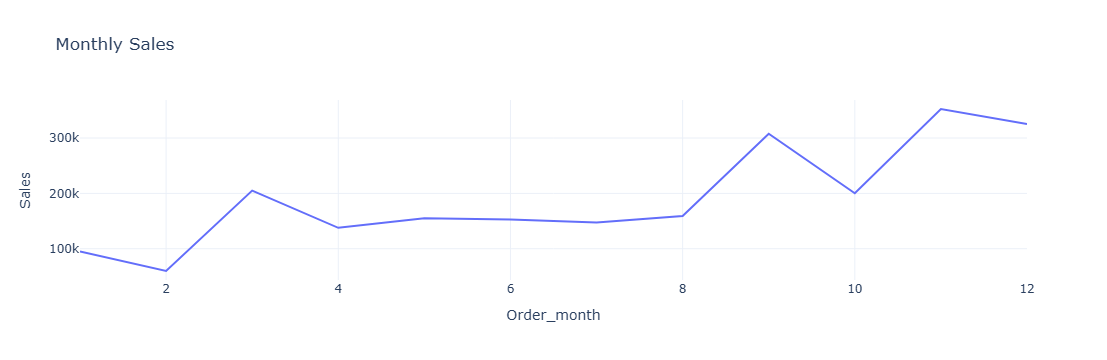

In [87]:
print(Sales_by_month)
Monthly_sales_fig = px.line(Sales_by_month,
                           x = 'Order_month',
                           y = 'Sales',
                           title = "Monthly Sales")
Monthly_sales_fig.show()

# 3) Analyze sales based product category & identify which is the highest and lowest category.

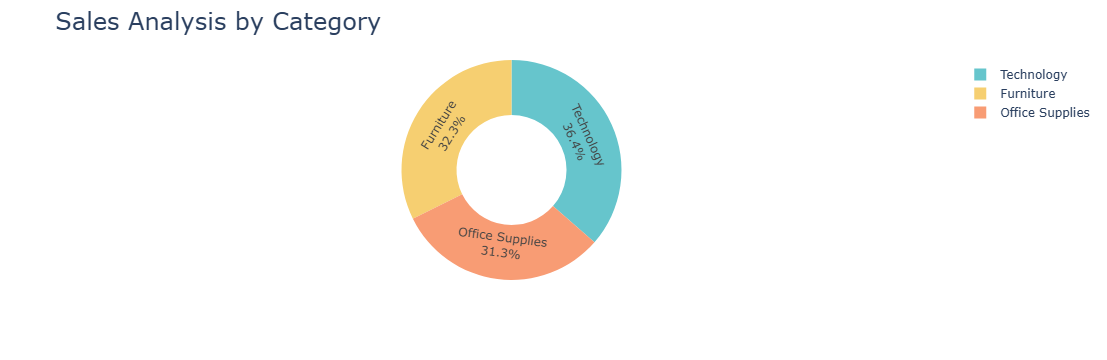

In [95]:
sales_by_category = df.groupby('Category')['Sales'].sum().reset_index()


sales_by_category_fig = px.pie(sales_by_category, 
             values='Sales', 
             names='Category', 
             hole=0.5, 
             color_discrete_sequence=px.colors.qualitative.Pastel)

sales_by_category_fig.update_traces(textposition='inside', textinfo='percent+label')
sales_by_category_fig.update_layout(title_text='Sales Analysis by Category', title_font=dict(size=24))

sales_by_category_fig.show()

# 4) The sales analysis needs to be done based on sub-category.

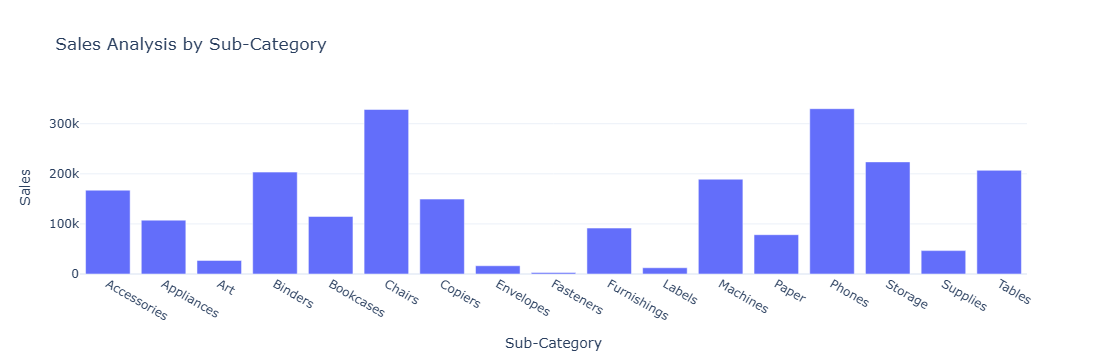

In [98]:
sales_by_subcategory = df.groupby('Sub-Category')['Sales'].sum().reset_index()
sales_by_subcategory_fig = px.bar(sales_by_subcategory, 
             x='Sub-Category', 
             y='Sales', 
             title='Sales Analysis by Sub-Category')
sales_by_subcategory_fig.show()

# 5) Need to analyze the monthly pfrofit and identify which is the highest & lowest profit month.

    Order_month      Profit
0             1   9134.4461
1             2  10294.6107
2             3  28594.6872
3             4  11587.4363
4             5  22411.3078
5             6  21285.7954
6             7  13832.6648
7             8  21776.9384
8             9  36857.4753
9            10  31784.0413
10           11  35468.4265
11           12  43369.1919


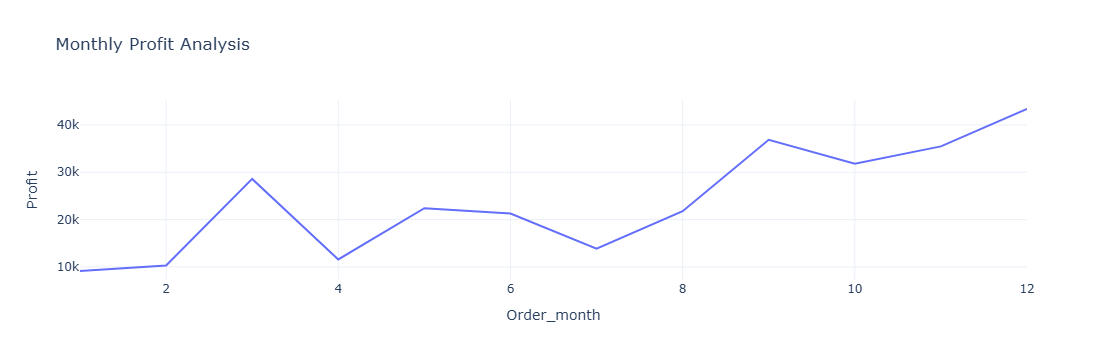

In [116]:
profit_by_month = df.groupby('Order_month')['Profit'].sum().reset_index()
print(profit_by_month)
profit_by_month_fig = px.line(profit_by_month, 
              x='Order_month', 
              y='Profit', 
              title='Monthly Profit Analysis')
profit_by_month_fig.show()

# 6) Analyze profit by Category and Sub-category.

          Category       Profit
0        Furniture   18451.2728
1  Office Supplies  122490.8008
2       Technology  145454.9481


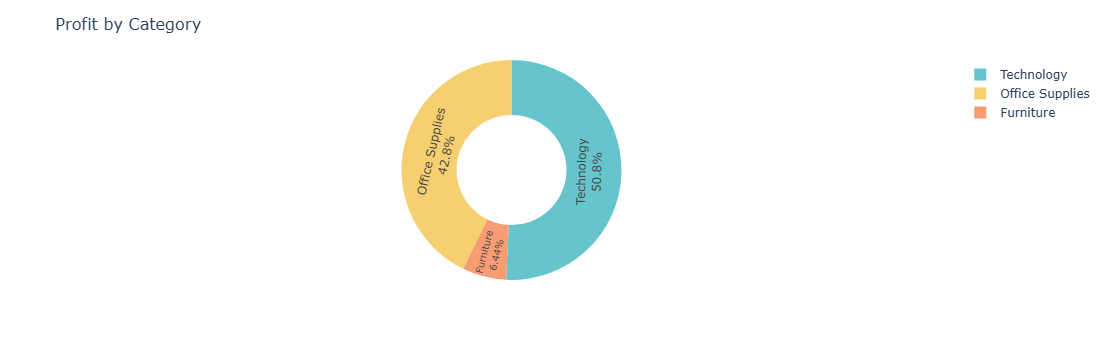

In [123]:
profit_by_category = df.groupby('Category')['Profit'].sum().reset_index()
print(profit_by_category)

fig = px.pie(profit_by_category, 
             values='Profit', 
             names='Category', 
             hole=0.5, 
             color_discrete_sequence=px.colors.qualitative.Pastel)

fig.update_traces(textposition='inside', textinfo='percent+label')
fig.update_layout(title_text='Profit by Category', title_font=dict(size=16))

fig.show()

   Sub-Category      Profit
0   Accessories  41936.6357
1    Appliances  18138.0054
2           Art   6527.7870
3       Binders  30221.7633
4     Bookcases  -3472.5560
5        Chairs  26590.1663
6       Copiers  55617.8249
7     Envelopes   6964.1767
8     Fasteners    949.5182
9   Furnishings  13059.1436
10       Labels   5546.2540
11     Machines   3384.7569
12        Paper  34053.5693
13       Phones  44515.7306
14      Storage  21278.8264
15     Supplies  -1189.0995
16       Tables -17725.4811


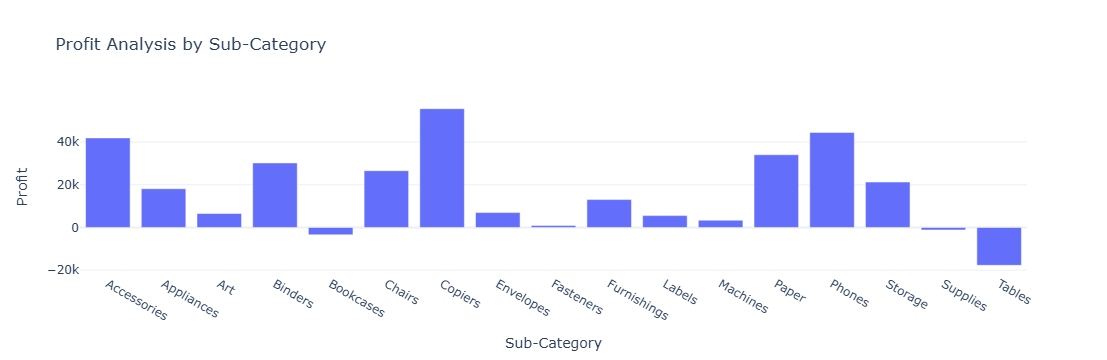

In [127]:
profit_by_subcategory = df.groupby('Sub-Category')['Profit'].sum().reset_index()
print(profit_by_subcategory)
fig = px.bar(profit_by_subcategory, x='Sub-Category', 
             y='Profit', 
             title='Profit Analysis by Sub-Category')
fig.show()

# 7) Analyze month wise profit.

In [134]:
Profits_by_month = df.groupby("Order_month")['Profit'].sum().reset_index()

    Order_month      Profit
0             1   9134.4461
1             2  10294.6107
2             3  28594.6872
3             4  11587.4363
4             5  22411.3078
5             6  21285.7954
6             7  13832.6648
7             8  21776.9384
8             9  36857.4753
9            10  31784.0413
10           11  35468.4265
11           12  43369.1919


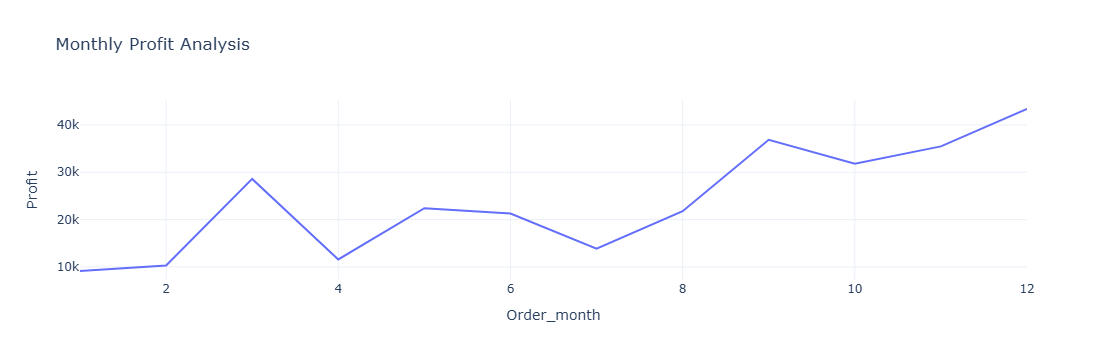

In [144]:
print(Profits_by_month)
fig = px.line(Profits_by_month, 
              x='Order_month', 
              y='Profit', 
              title='Monthly Profit Analysis')
fig.show()

# 8) Calculete which region earns the highest and lowest Revenue.

In [151]:
Sales_by_region = df.groupby("Region")['Sales'].sum().reset_index()

In [153]:
Sales_by_region

,Region,Sales
0,Central,501239.8908
1,East,678781.2400
2,South,391721.9050
3,West,725457.8245


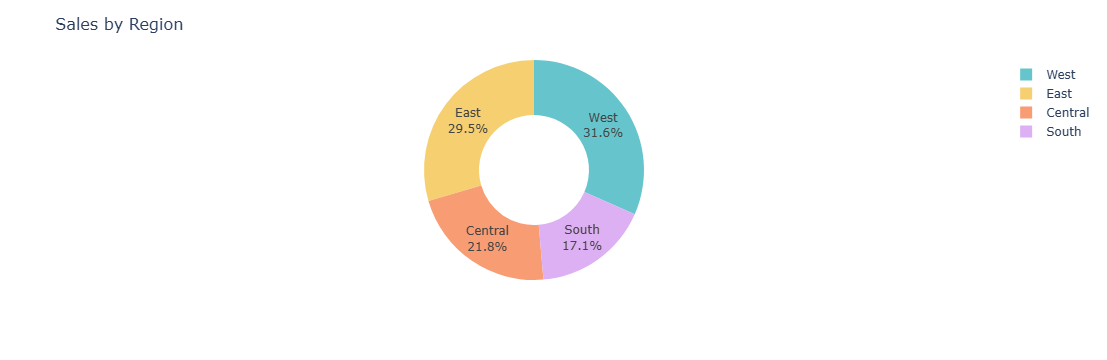

In [157]:
fig = px.pie(Sales_by_region, 
             values='Sales', 
             names='Region', 
             hole=0.5, 
             color_discrete_sequence=px.colors.qualitative.Pastel)

fig.update_traces(textposition='inside', textinfo='percent+label')
fig.update_layout(title_text='Sales by Region', title_font=dict(size=16))

fig.show()

# 9)Analyze most preferalbe shiping mode by customer.

In [173]:
shiping_mode_by_customer = df.groupby("Ship Mode")['Order ID'].count().reset_index()

In [175]:
shiping_mode_by_customer

,Ship Mode,Order ID
0,First Class,1538
1,Same Day,543
2,Second Class,1945
3,Standard Class,5968


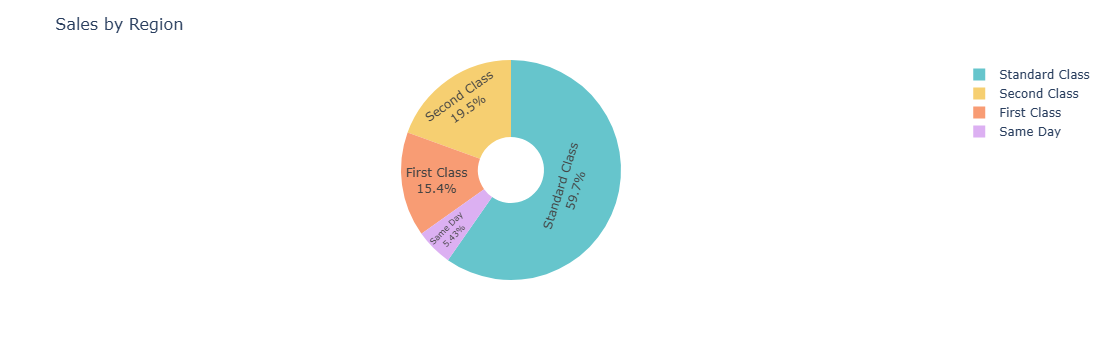

In [181]:
fig = px.pie(shiping_mode_by_customer, 
             values='Order ID', 
             names='Ship Mode', 
             hole=0.3, 
             color_discrete_sequence=px.colors.qualitative.Pastel)

fig.update_traces(textposition='inside', textinfo='percent+label')
fig.update_layout(title_text='Sales by Region', title_font=dict(size=16))

fig.show()

# 10) Analyze Customer segment wise sales and profit.

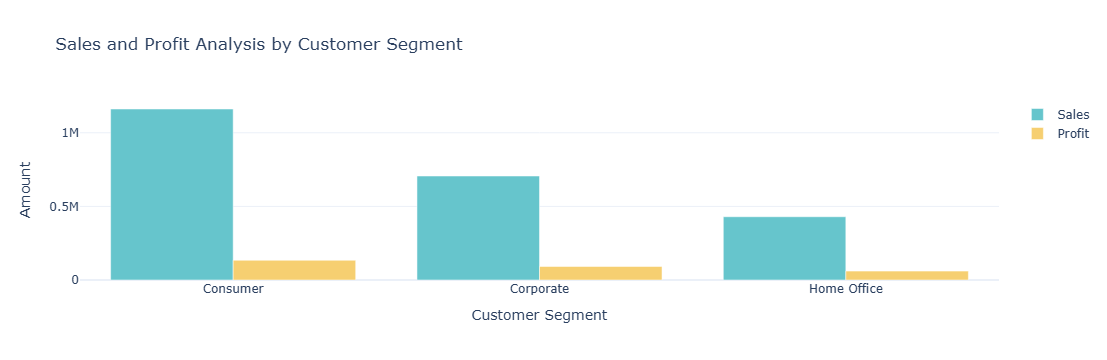

In [198]:
sales_profit_by_segment = df.groupby('Segment').agg({'Sales': 'sum', 'Profit': 'sum'}).reset_index()

color_palette = pcolour.qualitative.Pastel

fig = pgo.Figure()
fig.add_trace(pgo.Bar(x=sales_profit_by_segment['Segment'], 
                     y=sales_profit_by_segment['Sales'], 
                     name='Sales',
                     marker_color=color_palette[0]))

fig.add_trace(pgo.Bar(x=sales_profit_by_segment['Segment'], 
                     y=sales_profit_by_segment['Profit'], 
                     name='Profit',
                     marker_color=color_palette[1]))

fig.update_layout(title='Sales and Profit Analysis by Customer Segment',
                  xaxis_title='Customer Segment', yaxis_title='Amount')

fig.show()